This notebook will create some synthesised calls and check how well the ```measure_horseshoe_bat_calls``` package can replicate the original parameters. 

-- Thejasvi Beleyur 2020-02-17

In [1]:
import sys 
sys.path.append('../measure_horseshoe_bat_calls/')
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from measure_a_horseshoe_bat_call import make_one_CFcall, measure_hbc_call, make_overview_figure
from measure_a_horseshoe_bat_call import get_peak_frequency, remove_frequency

In [2]:
%matplotlib notebook

In [3]:
cf_duration = np.arange(0.05, 0.08,0.01)
fm_duration = np.arange(0.001, 0.006, 0.001)
peak_frequency = np.arange(90000, 120000, 10000)
fm_bandw = np.arange(15000, 25000, 1000)

In [4]:
all_parameter_combinations = np.array(np.meshgrid(cf_duration, fm_duration, peak_frequency, fm_bandw)).T.reshape(-1,4)
synthetic_calls = pd.DataFrame(all_parameter_combinations)
synthetic_calls.columns = ['cf_duration','fm_duration','peak_frequency','fm_bandw']
synthetic_calls['call_durn'] = synthetic_calls['cf_duration'] + synthetic_calls['fm_duration']
synthetic_calls.head()

,cf_duration,fm_duration,peak_frequency,fm_bandw,call_durn
0,0.05,0.001,90000.0,15000.0,0.051
1,0.05,0.002,90000.0,15000.0,0.052
2,0.05,0.003,90000.0,15000.0,0.053
3,0.05,0.004,90000.0,15000.0,0.054
4,0.05,0.005,90000.0,15000.0,0.055


In [5]:
multiparameter_calls = {}

In [18]:
fs = 1000000
for i, call_parameter in synthetic_calls.iloc[:5,:].iterrows():
    cf_durn, fm_durn, peak_f, fm_bw, _ = call_parameter
    only_call =  make_one_CFcall(cf_durn+fm_durn, fm_durn, cf_freq=peak_f, fs=fs,
                                                           call_shape='staplepin',
                                                           fm_bandwidth=fm_bw)
    gap = 250
    call_w_noise = np.random.normal(0,10**-60/20,only_call.size+gap*2)
    call_w_noise[gap:-gap] += only_call
    multiparameter_calls[tuple(call_parameter.tolist())] = call_w_noise
    

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


In [19]:
multiparameter_calls.keys()

dict_keys([(0.05, 0.001, 90000.0, 15000.0, 0.051000000000000004), (0.05, 0.002, 90000.0, 15000.0, 0.052000000000000005), (0.05, 0.003, 90000.0, 15000.0, 0.053000000000000005), (0.05, 0.004, 90000.0, 15000.0, 0.054000000000000006), (0.05, 0.005, 90000.0, 15000.0, 0.055), (0.060000000000000005, 0.001, 90000.0, 15000.0, 0.061000000000000006), (0.060000000000000005, 0.002, 90000.0, 15000.0, 0.062000000000000006), (0.060000000000000005, 0.003, 90000.0, 15000.0, 0.063), (0.060000000000000005, 0.004, 90000.0, 15000.0, 0.064), (0.060000000000000005, 0.005, 90000.0, 15000.0, 0.065), (0.07, 0.001, 90000.0, 15000.0, 0.07100000000000001), (0.07, 0.002, 90000.0, 15000.0, 0.07200000000000001), (0.07, 0.003, 90000.0, 15000.0, 0.07300000000000001), (0.07, 0.004, 90000.0, 15000.0, 0.07400000000000001), (0.07, 0.005, 90000.0, 15000.0, 0.07500000000000001), (0.05, 0.001, 100000.0, 15000.0, 0.051000000000000004), (0.05, 0.002, 100000.0, 15000.0, 0.052000000000000005), (0.05, 0.003, 100000.0, 15000.0, 0.05

In [20]:
index = 5
params = list(multiparameter_calls.keys())[index]
print(params)
call = list(multiparameter_calls.items())[index][1]
sounds, msmts = measure_hbc_call(call,fs=fs)

(0.060000000000000005, 0.001, 90000.0, 15000.0, 0.061000000000000006)


<IPython.core.display.Javascript object>


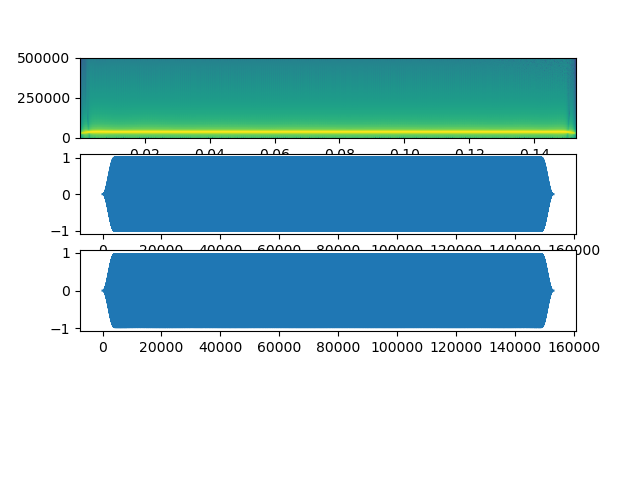

In [21]:
plt.figure()
plt.subplot(411)
plt.specgram(call, Fs=fs)
plt.subplot(412)
plt.plot(call)
plt.subplot(413)
peak_f = get_peak_frequency(call)
wo_peak = remove_frequency(call, peak_f, fs=fs)
plt.plot(wo_peak)


<IPython.core.display.Javascript object>


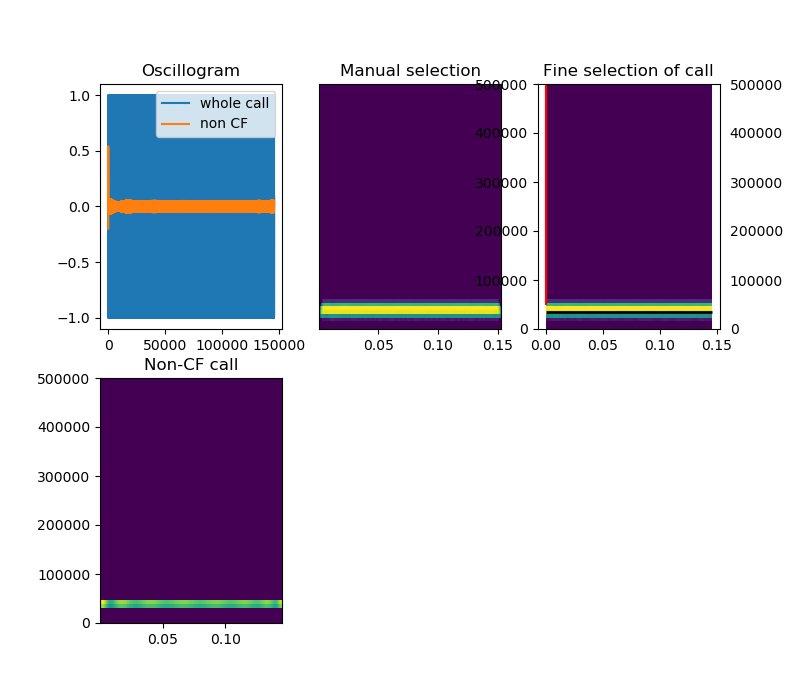

../measure_horseshoe_bat_calls\measure_a_horseshoe_bat_call.py:756: UserWarning: Only one segment is calculated since parameter NFFT (=64) >= signal length (=10).
  plt.specgram(sounds[2], Fs=fs, NFFT=half_winsize, noverlap=half_winsize-1, vmin=dyn_vmin);


In [22]:
make_overview_figure(call, sounds, msmts, fs=fs)

In [17]:
msmts[['call_duration','upfm_duration','downfm_duration','peak_frequency',
       'upfm_terminal_frequency','downfm_terminal_frequency','cf_duration']]

KeyError: "['downfm_terminal_frequency', 'downfm_duration'] not in index"

In [28]:
multiparameter_calls.items()[index][0]

TypeError: 'dict_items' object is not subscriptable

### Comment:
At least right now I can see that the CF part of the call is being picked up relatively accurately (peak CF and duration) -- but the FM durations are not being picked up well at all. They are constantly being under-estimated. I guess this is where the peak-CF amplification and energy profile calculations may be more useful. 